In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import dill
from IPython.core import display as ICD  # to print multiple nice pandas tables
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tqdm
import glob
from tqdm import tqdm_notebook, tnrange
import pyperclip
sns.set()
import glob

In [3]:
import datasets
import experiments as exp
import utils

In [4]:
from collections import defaultdict


# Batch results

In [5]:
dump_pattern = exp.dump_file_pattern
dump_fnames = glob.glob(dump_pattern.format('*'))
dumps = defaultdict(dict)
for fname in dump_fnames:
    d = pickle.load(open(fname,'rb'))
    for k1 in d:
        for k2 in d[k1]:
            dumps[k1][k2] = d[k1][k2]

In [6]:
num = 10
template = r"""
\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        %s
      \subcaption{%s}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        %s
      \subcaption{%s}
    \end{minipage} 
    \caption{%s}
    \label{%s}
\end{table}
"""
def format_template(c,c1,c2,t1,t2,r):
    return template%(t1,c1,t2,c2,c,r)

def anal_w(w, dataset='', ref=''):
    srt = sorted(list(w.items()), key=lambda x:x[1], reverse=True)
    pdf = pd.DataFrame()
    ndf = pd.DataFrame()
    
    pwords, pweights = zip(*srt[:num])
    nwords, nweights = zip(*srt[-num:])
    pdf['words'] = pwords
    pdf["$w'$"] = pweights
    pdf["$w'$"] =pdf["$w'$"].round(2)
    ndf['words'] = nwords
    ndf["$w'$"] = nweights
    ndf["$w'$"] =ndf["$w'$"].round(2)
    ptex = pdf.to_latex(index=False)
    ntex = ndf.to_latex(index=False)
    formated = format_template(dataset,"Words with heighest $w'$","Words with lowest $w'$",ptex,ntex, ref)
    
    return formated.replace('\\$','$')

In [7]:
dumps['CRDataset'][('batch','None',0.1,0)]['w']['(']

0.5689458129125426

In [8]:
tex = anal_w(dumps['CRDataset'][('batch','None',0.1,1)]['w'], 
             'Most reweighted words on CR dataset for scheme None',
             'tab:words:CR:None')
pyperclip.copy(tex)
print(tex)


\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
    words &  $w'$ \\
\midrule
     slow &  3.06 \\
    happy &  2.65 \\
      you &  2.60 \\
    works &  2.51 \\
     good &  2.50 \\
      bad &  2.46 \\
      and &  2.45 \\
   expect &  2.38 \\
 pictures &  2.38 \\
   highly &  2.34 \\
\bottomrule
\end{tabular}

      \subcaption{Words with heighest $w'$}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
  words &  $w'$ \\
\midrule
   that &  0.25 \\
     am &  0.23 \\
   down &  0.22 \\
    two &  0.21 \\
   then &  0.21 \\
      3 &  0.20 \\
   give &  0.15 \\
     is &  0.14 \\
      n &  0.07 \\
 diaper &  0.02 \\
\bottomrule
\end{tabular}

      \subcaption{Words with lowest $w'$}
    \end{minipage} 
    \caption{Most reweighted words on CR dataset for scheme None}
    \label{tab:words:CR:None}
\end{table}



In [9]:
tex = anal_w(dumps['CRDataset'][('batch','tfidf',0.1,1)]['w'], 
             'Most reweighted words on CR dataset for scheme tfidf',
             'tab:words:CR:tfidf')
pyperclip.copy(tex)
print(tex)


\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
   words &  $w'$ \\
\midrule
      't &  3.52 \\
     not &  3.02 \\
     bad &  2.86 \\
    well &  2.80 \\
   price &  2.56 \\
    best &  2.35 \\
     low &  2.30 \\
   worst &  2.19 \\
    does &  2.11 \\
 process &  1.99 \\
\bottomrule
\end{tabular}

      \subcaption{Words with heighest $w'$}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
    words &  $w'$ \\
\midrule
     then &  0.18 \\
    looks &  0.17 \\
   pocket &  0.17 \\
       an &  0.16 \\
  playing &  0.15 \\
     this &  0.10 \\
        3 &  0.09 \\
 programs &  0.05 \\
       -- &  0.03 \\
       'm &  0.03 \\
\bottomrule
\end{tabular}

      \subcaption{Words with lowest $w'$}
    \end{minipage} 
    \caption{Most reweighted words on CR dataset for scheme tfidf}
    \label{tab:words:CR:tfidf}
\end{table}



In [10]:
tex = anal_w(dumps['CRDataset'][('batch','tfig',0.1,2)]['w'], 
             'Most reweighted words on CR dataset for scheme tfig',
             'tab:words:CR:tfig')
pyperclip.copy(tex)
print(tex)


\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
    words &  $w'$ \\
\midrule
 features &  3.33 \\
 symantec &  3.05 \\
  perfect &  2.96 \\
      the &  2.94 \\
     flaw &  2.87 \\
      bit &  2.83 \\
     slow &  2.71 \\
  awesome &  2.69 \\
  process &  2.66 \\
  useless &  2.64 \\
\bottomrule
\end{tabular}

      \subcaption{Words with heighest $w'$}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
  words &  $w'$ \\
\midrule
   that &  0.92 \\
     is &  0.88 \\
  great &  0.83 \\
     't &  0.83 \\
    not &  0.72 \\
   very &  0.62 \\
      , &  0.59 \\
    and &  0.52 \\
 camera &  0.43 \\
   this &  0.25 \\
\bottomrule
\end{tabular}

      \subcaption{Words with lowest $w'$}
    \end{minipage} 
    \caption{Most reweighted words on CR dataset for scheme tfig}
    \label{tab:words:CR:tfig}
\end{table}



# TREC

In [11]:
tex = anal_w(dumps['TRECDataset-DESC'][('batch','None',0.1,2)]['w'], 
             'Most reweighted words on DESC dataset for scheme None',
             'tab:words:TREC:none')
pyperclip.copy(tex)
print(tex)


\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
  words &   $w'$ \\
\midrule
   what &  13.20 \\
     is &   9.89 \\
    how &   8.39 \\
    are &   5.08 \\
   mean &   4.86 \\
   long &   4.60 \\
    why &   3.96 \\
    big &   3.93 \\
 reason &   2.95 \\
 origin &   2.89 \\
\bottomrule
\end{tabular}

      \subcaption{Words with heighest $w'$}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
    words &  $w'$ \\
\midrule
     form &  0.57 \\
     name &  0.55 \\
    where &  0.52 \\
 language &  0.51 \\
     does &  0.48 \\
       of &  0.46 \\
     when &  0.45 \\
      and &  0.20 \\
      the &  0.15 \\
        , &  0.07 \\
\bottomrule
\end{tabular}

      \subcaption{Words with lowest $w'$}
    \end{minipage} 
    \caption{Most reweighted words on DESC dataset for scheme None}
    \label{tab:words:TREC:none}
\end{table}



In [12]:
tex = anal_w(dumps['TRECDataset-DESC'][('batch','tfidf',0.1,2)]['w'], 
             'Most reweighted words on DESC dataset for scheme tfidf',
             'tab:words:trec:tfidf')
pyperclip.copy(tex)
print(tex)


\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
    words &  $w'$ \\
\midrule
      how &  5.09 \\
     mean &  4.72 \\
       is &  3.88 \\
       in &  3.06 \\
     long &  3.05 \\
      big &  2.89 \\
     what &  2.87 \\
     come &  2.54 \\
 happened &  2.32 \\
   should &  2.26 \\
\bottomrule
\end{tabular}

      \subcaption{Words with heighest $w'$}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
   words &  $w'$ \\
\midrule
     nnp &  0.43 \\
   birds &  0.41 \\
    with &  0.37 \\
    than &  0.36 \\
   where &  0.34 \\
     its &  0.32 \\
    term &  0.32 \\
    were &  0.32 \\
 between &  0.01 \\
       ? &  0.00 \\
\bottomrule
\end{tabular}

      \subcaption{Words with lowest $w'$}
    \end{minipage} 
    \caption{Most reweighted words on DESC dataset for scheme tfidf}
    \label{tab:words:trec:tfidf}
\end{table}



In [13]:
tex = anal_w(dumps['TRECDataset-DESC'][('batch','tfig',0.1,2)]['w'], 
             'Most reweighted words on DESC dataset for scheme tfig',
             'tab:words:TREC:tfig')
pyperclip.copy(tex)
print(tex)


\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
      words &   $w'$ \\
\midrule
         is &  13.85 \\
       mean &   6.05 \\
       much &   5.48 \\
      where &   5.40 \\
    meaning &   5.39 \\
        are &   5.28 \\
        how &   4.92 \\
          s &   4.67 \\
       long &   4.35 \\
 difference &   4.35 \\
\bottomrule
\end{tabular}

      \subcaption{Words with heighest $w'$}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
words &  $w'$ \\
\midrule
  sea &  1.00 \\
  far &  1.00 \\
    a &  0.91 \\
    , &  0.81 \\
  who &  0.76 \\
   do &  0.66 \\
   in &  0.61 \\
    ? &  0.51 \\
  the &  0.01 \\
  was &  0.00 \\
\bottomrule
\end{tabular}

      \subcaption{Words with lowest $w'$}
    \end{minipage} 
    \caption{Most reweighted words on DESC dataset for scheme tfig}
    \label{tab:words:TREC:tfig}
\end{table}



# Plot w

In [14]:
def plto_w(w, dataset='', ref=''):
    srt = sorted(list(w.items()), key=lambda x:x[1], reverse=True)
    words, weights = zip(*srt)
    plt.hist(weights, log=True)
    

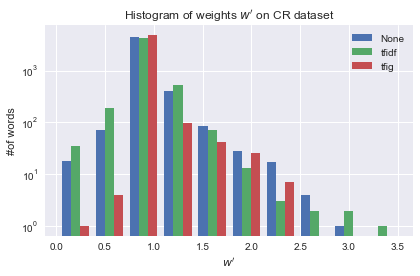

In [15]:
fig, axs = plt.subplots(figsize=(6,4))

dkey = 'CRDataset'
dname = 'CR'
schemes = ['None', 'tfidf','tfig']
toplot = [
    list(dumps[dkey][('batch',scheme,0.1,1)]['w'].values())
    for scheme in schemes
]

axs.hist(toplot, log=True, label=schemes)
axs.legend()
axs.set_title("Histogram of weights $w'$ on %s dataset"%dname)
axs.set_xlabel("$w'$")
axs.set_ylabel("#of words")
fig.tight_layout()
fig.savefig('imgs/histw_cr.png', dpi=1000)


In [16]:
import scipy

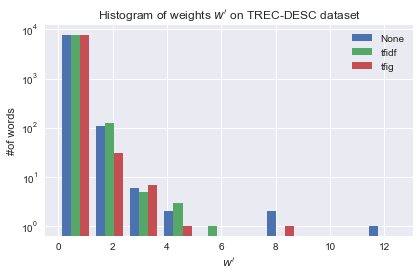

In [17]:
fig, axs = plt.subplots(figsize=(6,4))

dkey = 'TRECDataset-DESC'
dname = 'TREC-DESC'
toplot = [
    list(dumps[dkey][('batch','None',0.1,1)]['w'].values()),
    list(dumps[dkey][('batch','tfidf',0.1,1)]['w'].values()),
    list(dumps[dkey][('batch','tfig',0.1,1)]['w'].values())
]

axs.hist(toplot, log=True, label=['None','tfidf','tfig'])
axs.legend()
axs.set_title("Histogram of weights $w'$ on %s dataset"%dname)
axs.set_xlabel("$w'$")
axs.set_ylabel("#of words")
fig.tight_layout()
fig.savefig('imgs/histw_desc.png', dpi=1000)


# Learning curves

In [18]:
def learning_curves(dataset, scheme, save=None):
    du = dumps[dataset][('batch',scheme,0.1,0)]
    dshort = dataset.replace('Dataset','').replace('TREC-','')
    ns = list(range(len(du['train'])))
    plt.plot(ns, du['train'], label='train')
    plt.plot(ns, du['test'], label='test')
    plt.plot(ns, du['valid'], label='valid')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning curves for scheme {} on dataset {}'.format(scheme, dshort))
    if save is not None:
        plt.savefig(save, dpi=1000)
    plt.show()


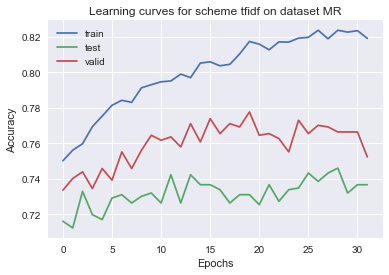

In [19]:
learning_curves('MRDataset', 'tfidf', 'imgs/learning_curve_MR_tfidf.png')

In [20]:
import scipy
import elsa

In [21]:
def correlate(w1, w2):
    common = set(w1.keys()) & set(w2.keys())
    v1 = []
    v2 = []
    for word in common:
        v1.append(w1[word])
        v2.append(w2[word])
    
    plt.scatter(v1,v2)
    plt.title(scipy.stats.spearmanr(v1,v2))

TRECDataset-ABBR None


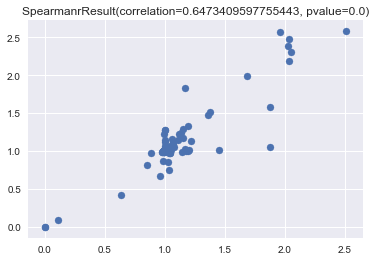

TRECDataset-ABBR tfidf


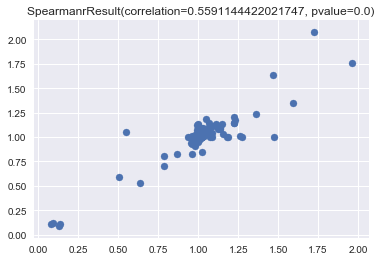

TRECDataset-ABBR tfchi2


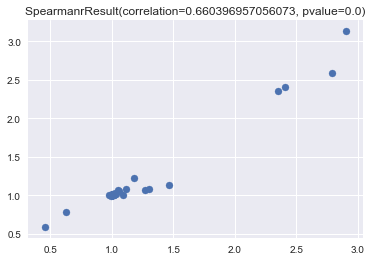

TRECDataset-ABBR tfig


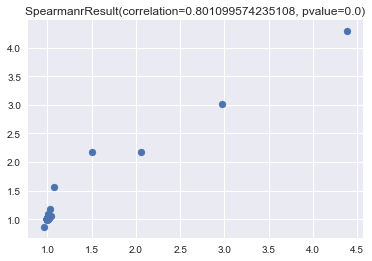

TRECDataset-ABBR tfgr


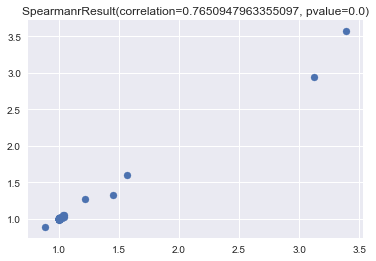

TRECDataset-ABBR tfor


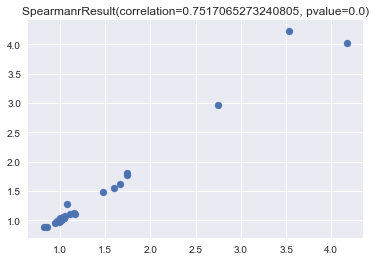

TRECDataset-ABBR tfrf


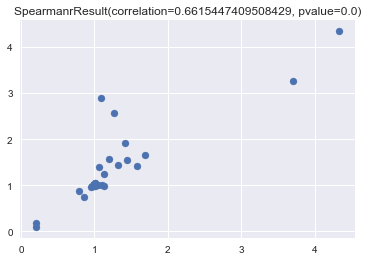

TRECDataset-DESC None


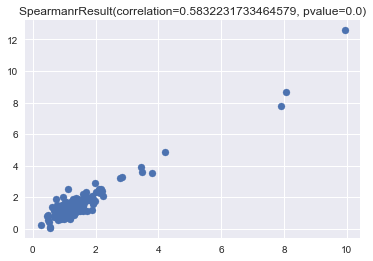

TRECDataset-DESC tfidf


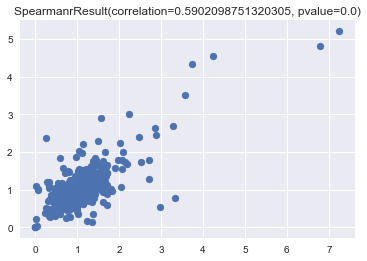

TRECDataset-DESC tfchi2


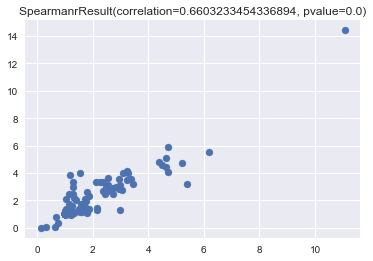

TRECDataset-DESC tfig


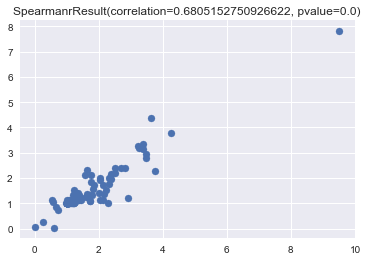

TRECDataset-DESC tfgr


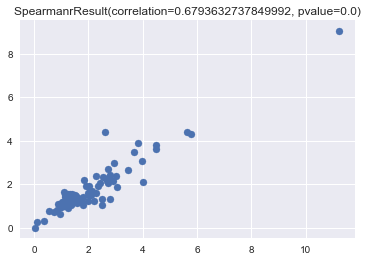

TRECDataset-DESC tfor


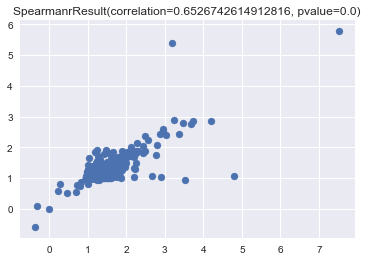

TRECDataset-DESC tfrf


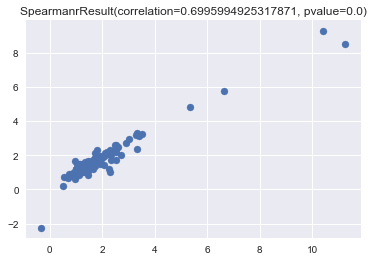

TRECDataset-ENTY None


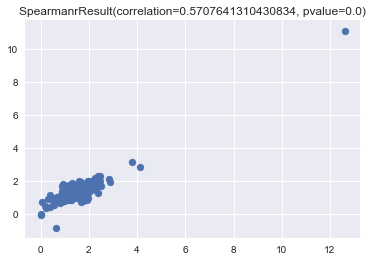

TRECDataset-ENTY tfidf


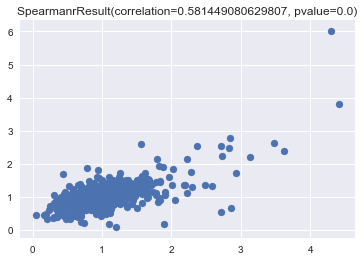

TRECDataset-ENTY tfchi2


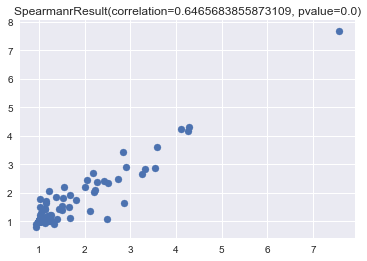

TRECDataset-ENTY tfig


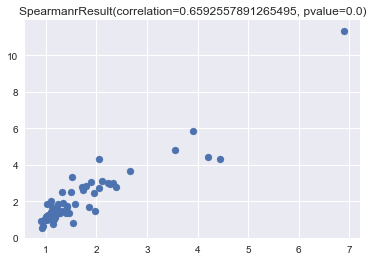

TRECDataset-ENTY tfgr


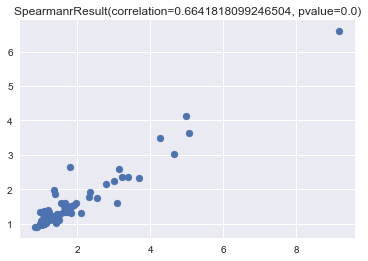

TRECDataset-ENTY tfor


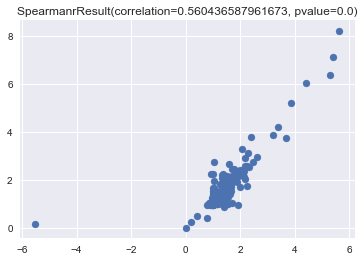

TRECDataset-ENTY tfrf


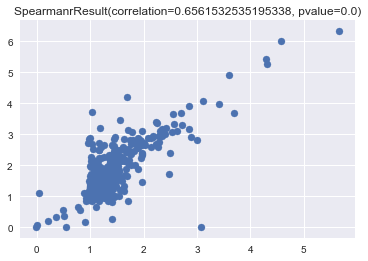

TRECDataset-HUM None


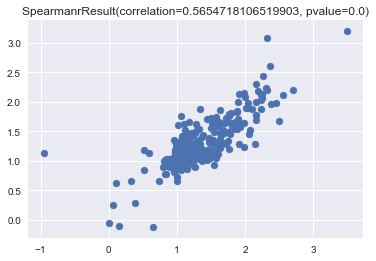

TRECDataset-HUM tfidf


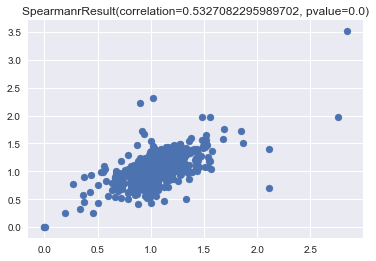

TRECDataset-HUM tfchi2


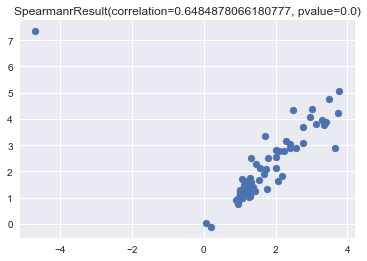

TRECDataset-HUM tfig


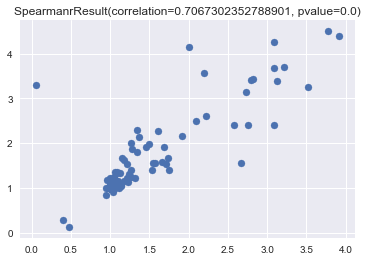

TRECDataset-HUM tfgr


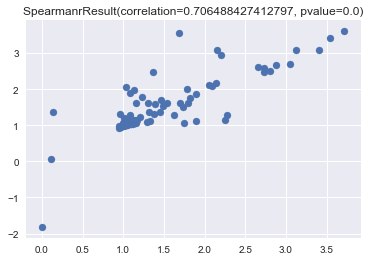

TRECDataset-HUM tfor


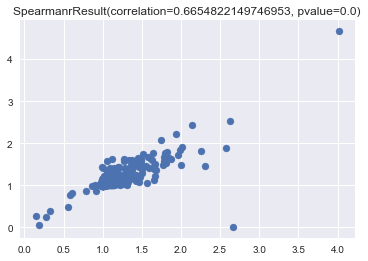

TRECDataset-HUM tfrf


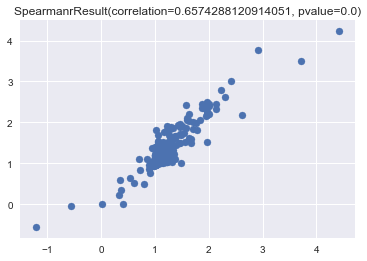

TRECDataset-LOC None


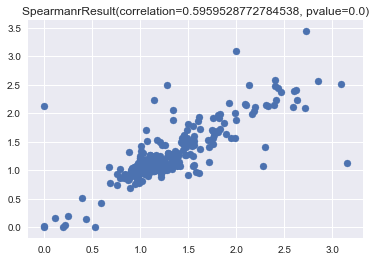

TRECDataset-LOC tfidf


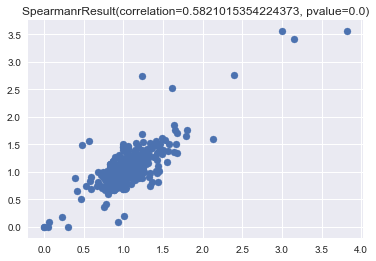

TRECDataset-LOC tfchi2


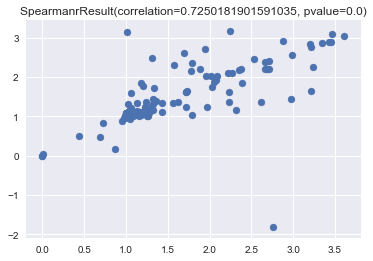

TRECDataset-LOC tfig


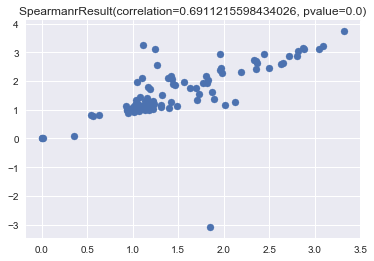

TRECDataset-LOC tfgr


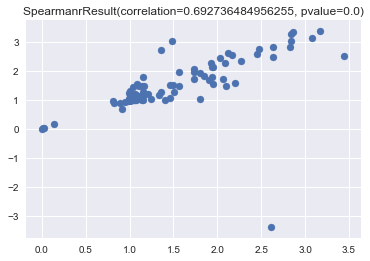

TRECDataset-LOC tfor


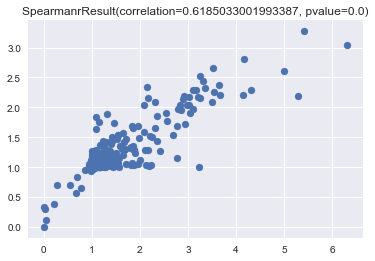

TRECDataset-LOC tfrf


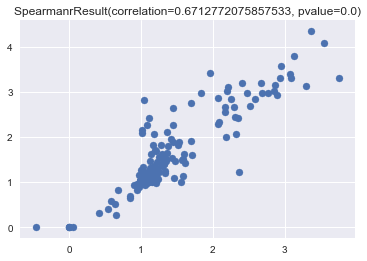

TRECDataset-NUM None


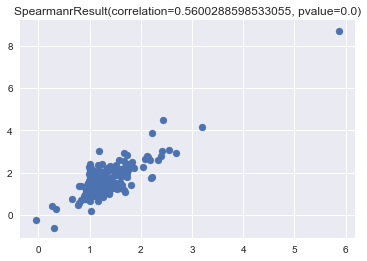

TRECDataset-NUM tfidf


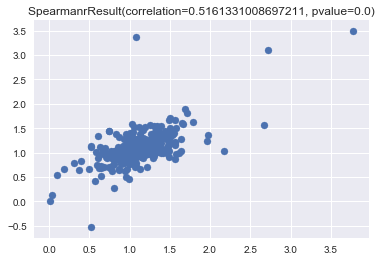

TRECDataset-NUM tfchi2


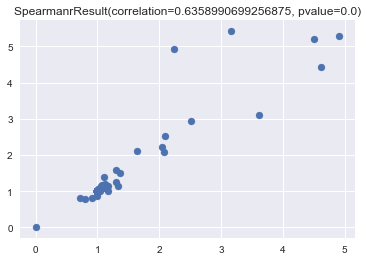

TRECDataset-NUM tfig


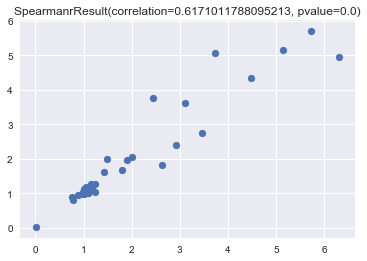

TRECDataset-NUM tfgr


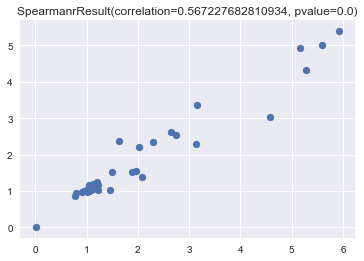

TRECDataset-NUM tfor


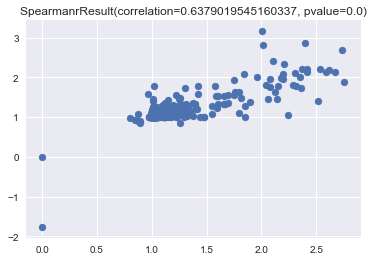

TRECDataset-NUM tfrf


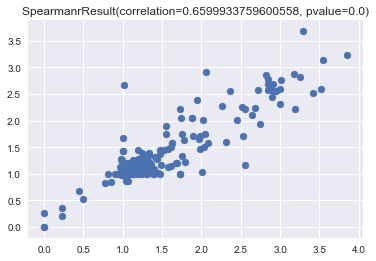

CRDataset None


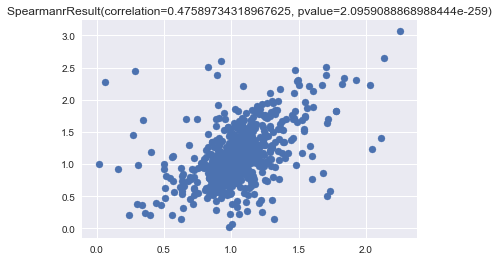

CRDataset tfidf


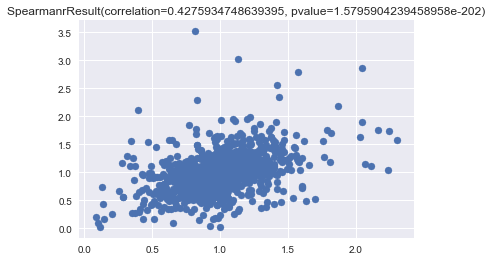

CRDataset tfchi2


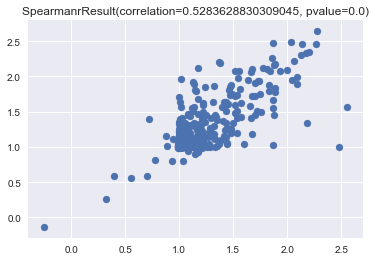

CRDataset tfig


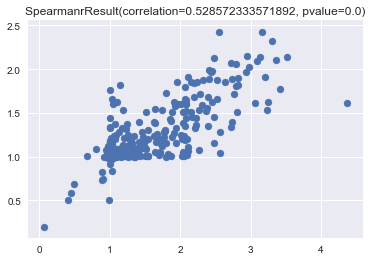

CRDataset tfgr


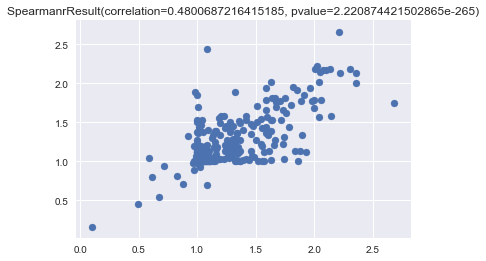

CRDataset tfor


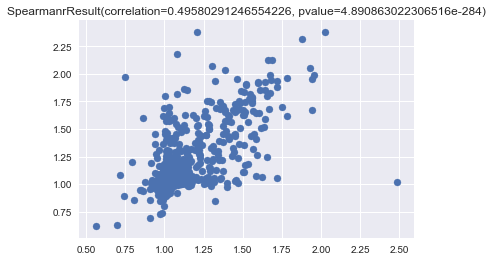

CRDataset tfrf


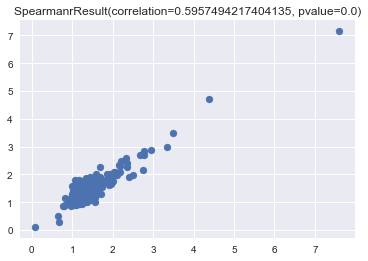

MPQADataset None


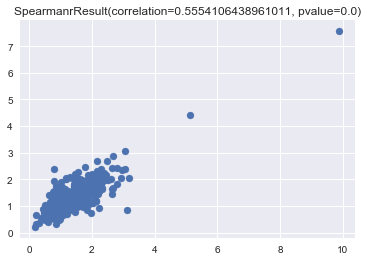

MPQADataset tfidf


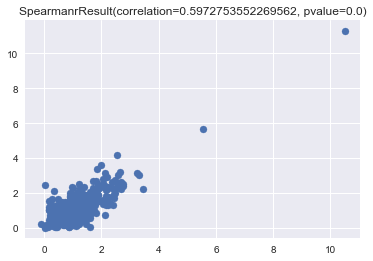

MPQADataset tfchi2


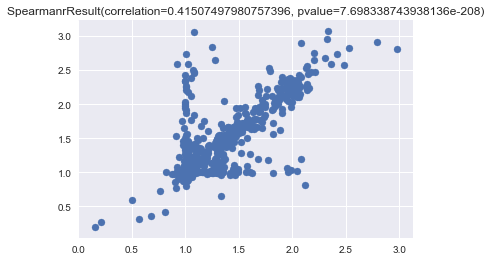

MPQADataset tfig


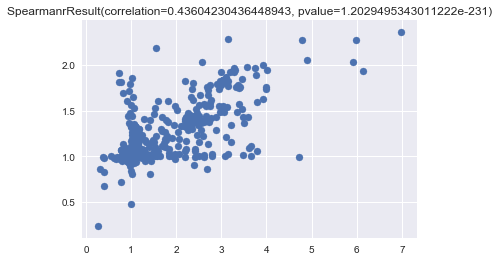

MPQADataset tfgr


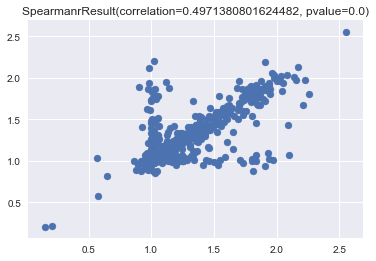

MPQADataset tfor


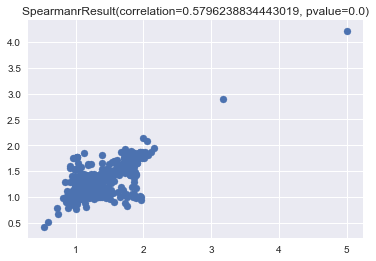

MPQADataset tfrf


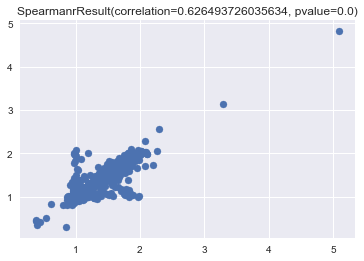

MRDataset None


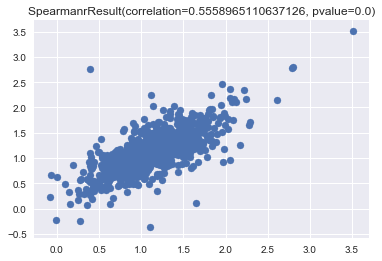

MRDataset tfidf


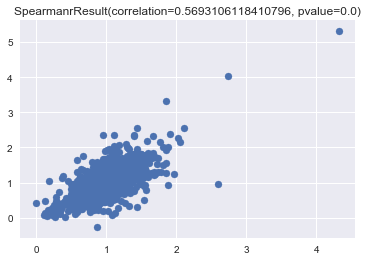

MRDataset tfchi2


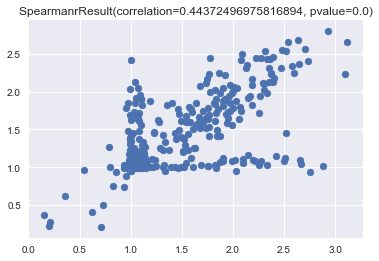

MRDataset tfig


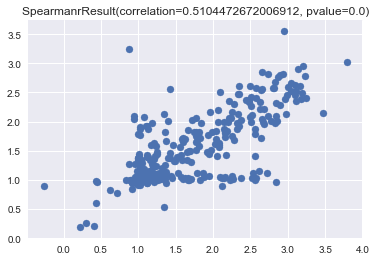

MRDataset tfgr


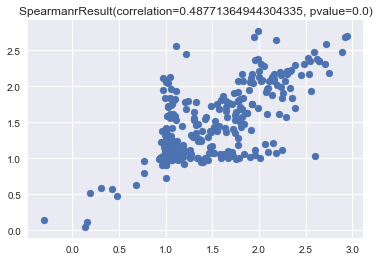

MRDataset tfor


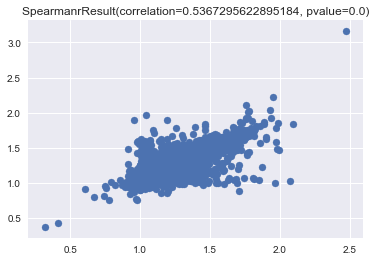

MRDataset tfrf


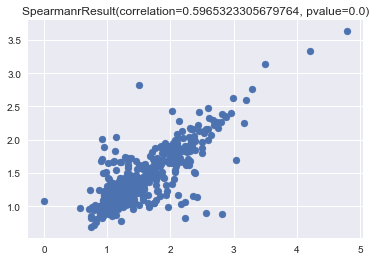

SUBJDataset None


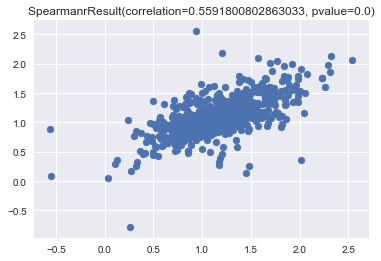

SUBJDataset tfidf


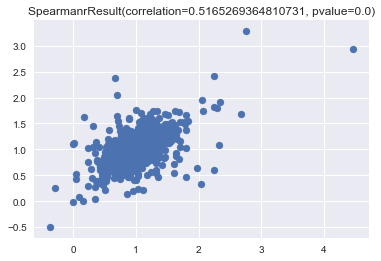

SUBJDataset tfchi2


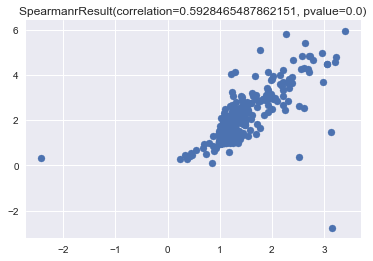

SUBJDataset tfig


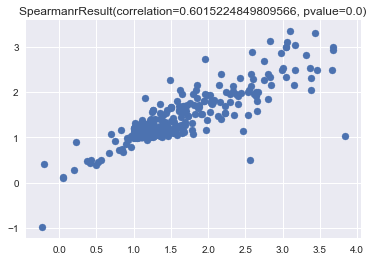

SUBJDataset tfgr


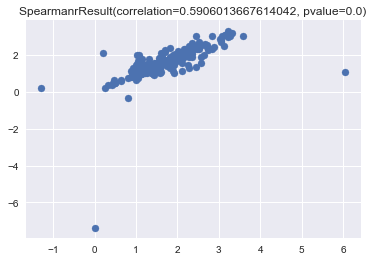

SUBJDataset tfor


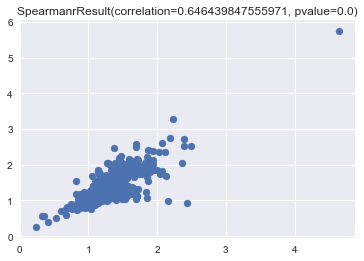

SUBJDataset tfrf


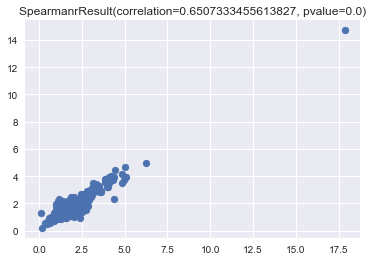

In [22]:
for dat in utils.TREC + utils.NOTREC:
    for scheme in elsa.ELSA.SCHEMES:
        print(dat, scheme)
        correlate(dumps[dat][('batch',scheme,0.1,0)]['w'], dumps[dat][('batch',scheme,0.1,1)]['w'])
        plt.show()
        

CRDataset None


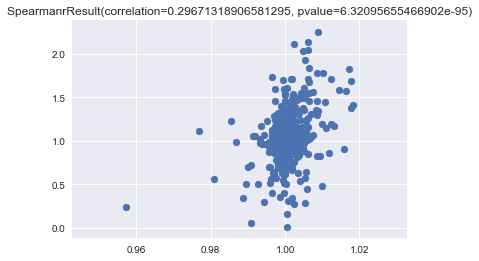

CRDataset tfidf


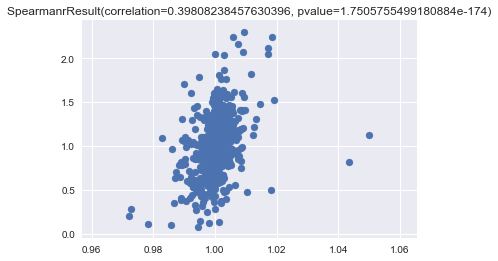

CRDataset tfchi2


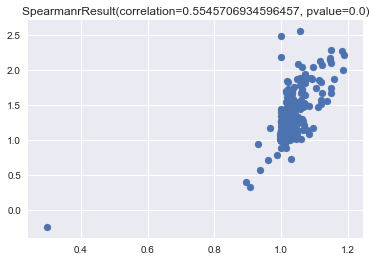

CRDataset tfig


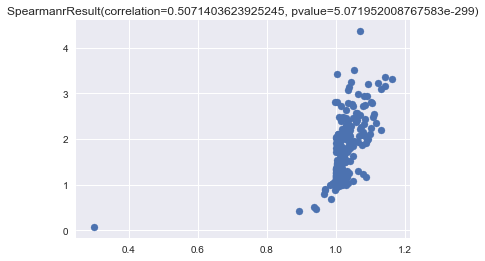

CRDataset tfgr


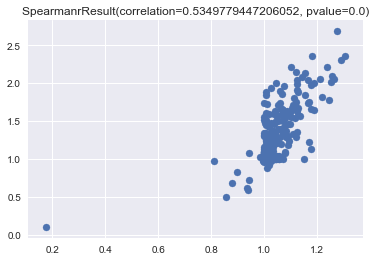

CRDataset tfor


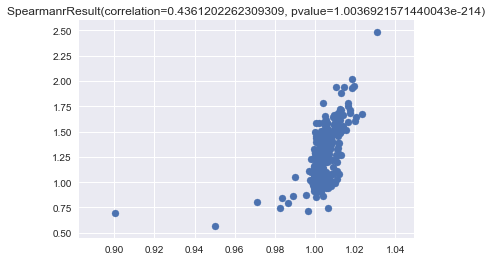

CRDataset tfrf


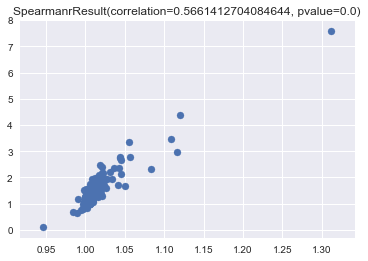

MPQADataset None


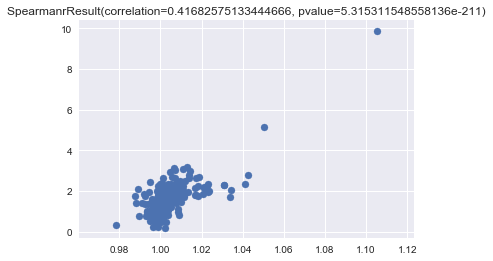

MPQADataset tfidf


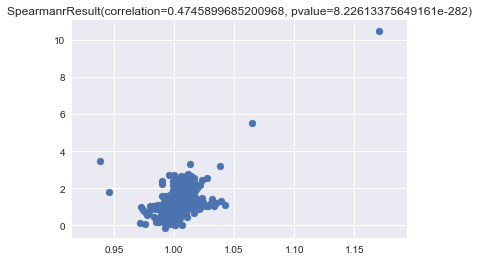

MPQADataset tfchi2


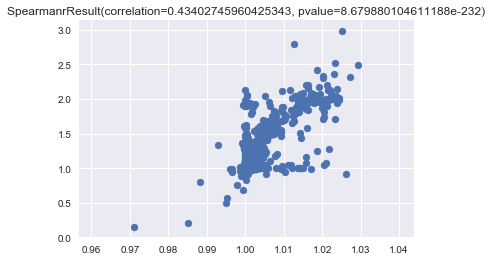

MPQADataset tfig


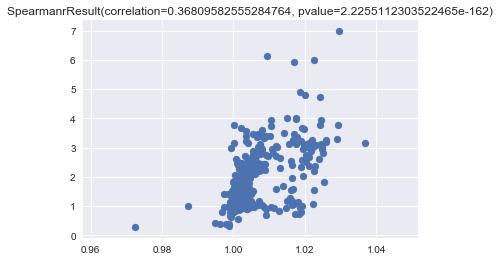

MPQADataset tfgr


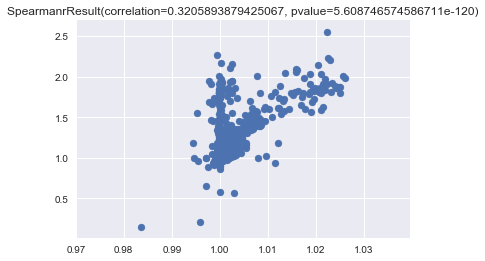

MPQADataset tfor


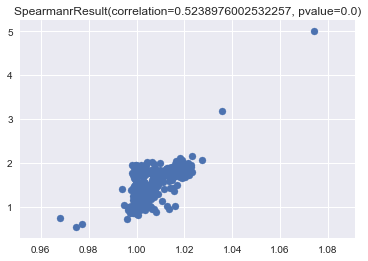

MPQADataset tfrf


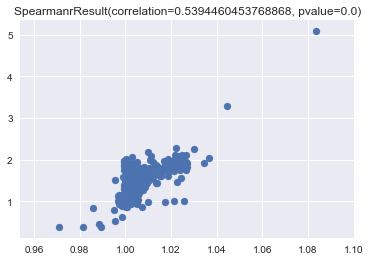

MRDataset None


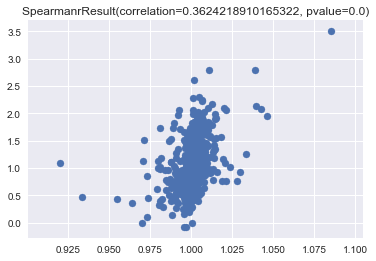

MRDataset tfidf


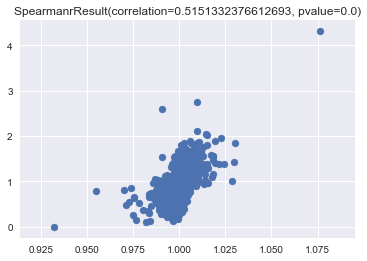

MRDataset tfchi2


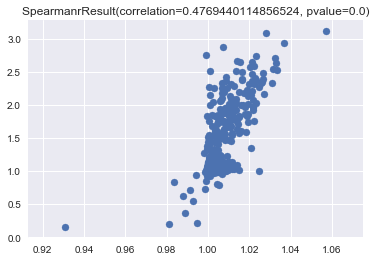

MRDataset tfig


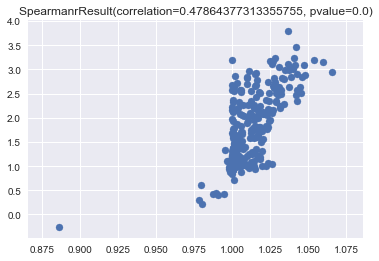

MRDataset tfgr


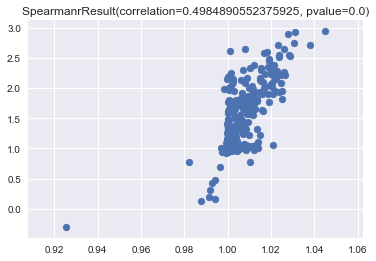

MRDataset tfor


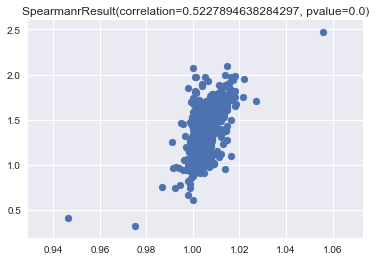

MRDataset tfrf


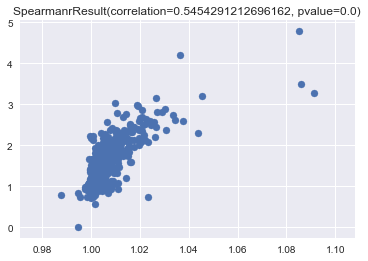

SUBJDataset None


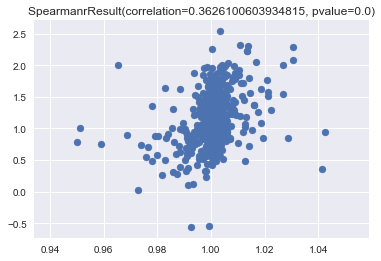

SUBJDataset tfidf


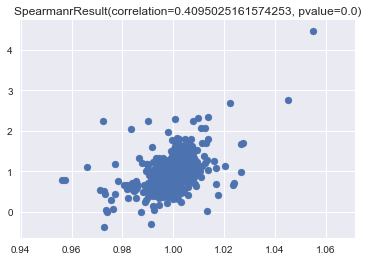

SUBJDataset tfchi2


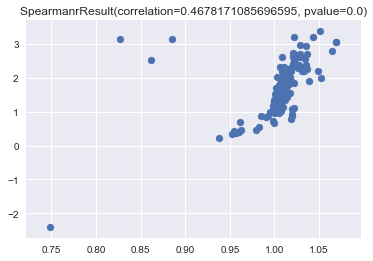

SUBJDataset tfig


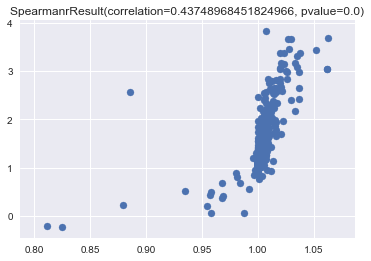

SUBJDataset tfgr


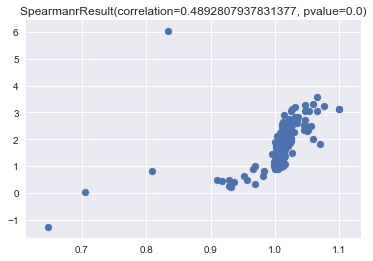

SUBJDataset tfor


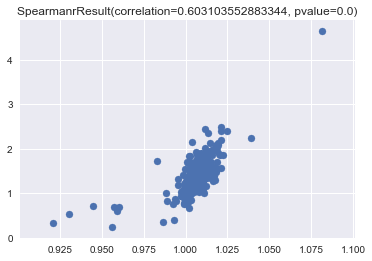

SUBJDataset tfrf


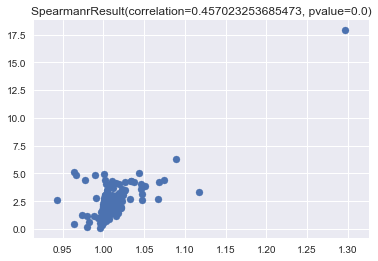

TRECDataset-ABBR None


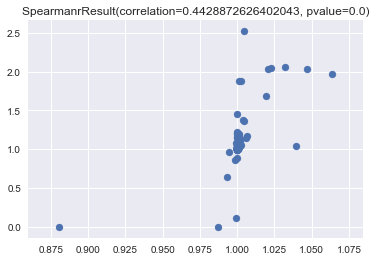

TRECDataset-ABBR tfidf


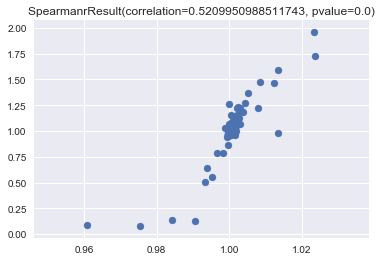

TRECDataset-ABBR tfchi2


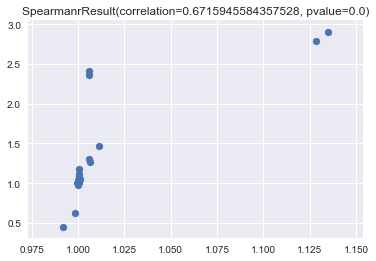

TRECDataset-ABBR tfig


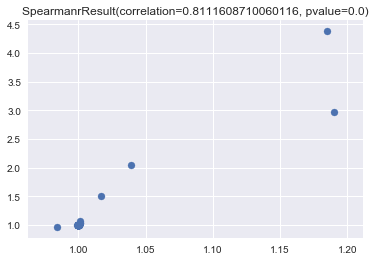

TRECDataset-ABBR tfgr


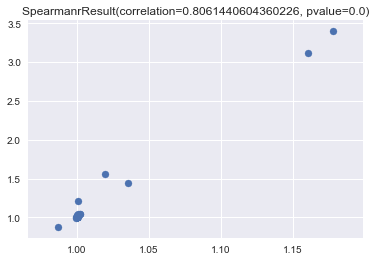

TRECDataset-ABBR tfor


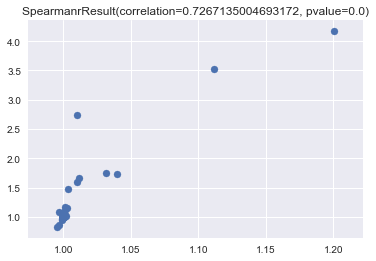

TRECDataset-ABBR tfrf


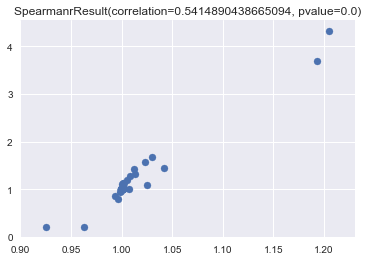

TRECDataset-DESC None


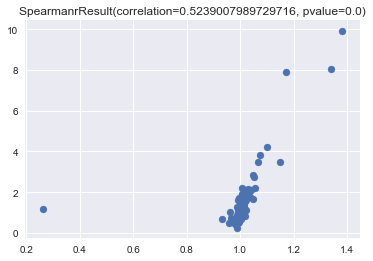

TRECDataset-DESC tfidf


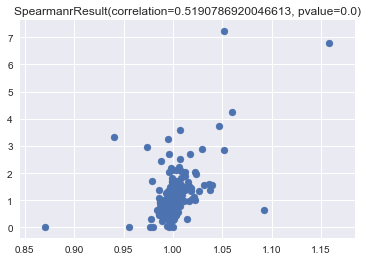

TRECDataset-DESC tfchi2


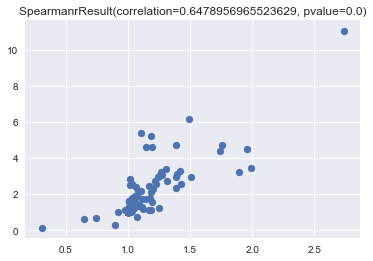

TRECDataset-DESC tfig


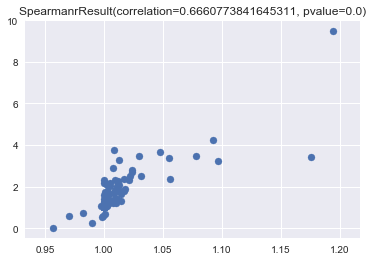

TRECDataset-DESC tfgr


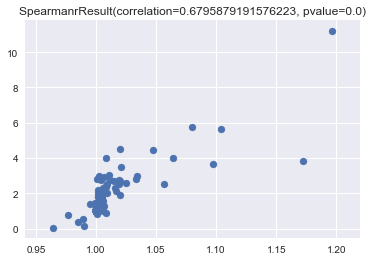

TRECDataset-DESC tfor


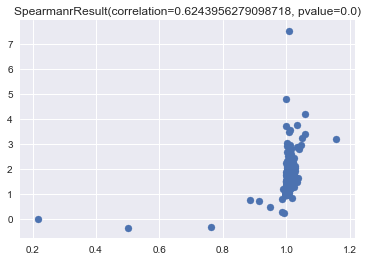

TRECDataset-DESC tfrf


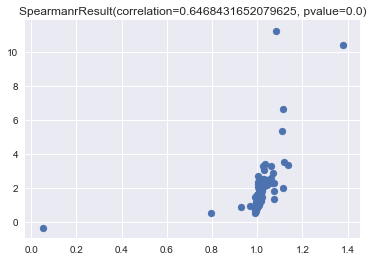

TRECDataset-ENTY None


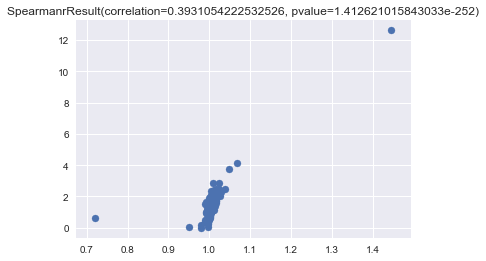

TRECDataset-ENTY tfidf


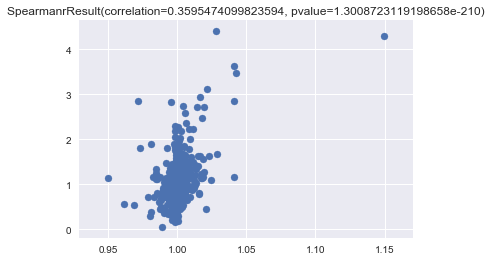

TRECDataset-ENTY tfchi2


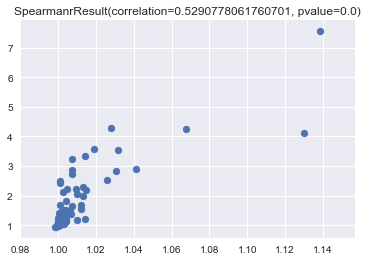

TRECDataset-ENTY tfig


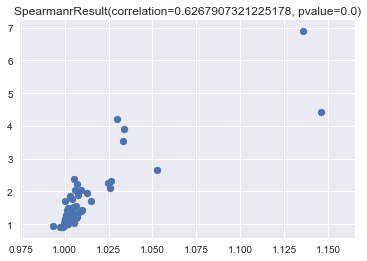

TRECDataset-ENTY tfgr


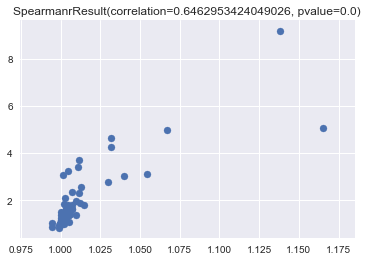

TRECDataset-ENTY tfor


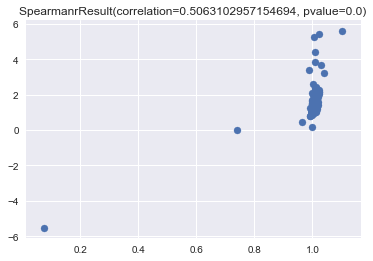

TRECDataset-ENTY tfrf


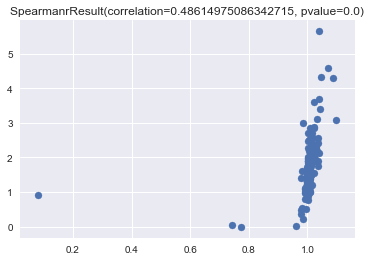

TRECDataset-HUM None


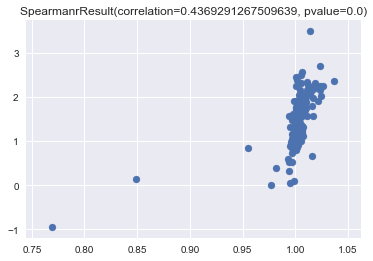

TRECDataset-HUM tfidf


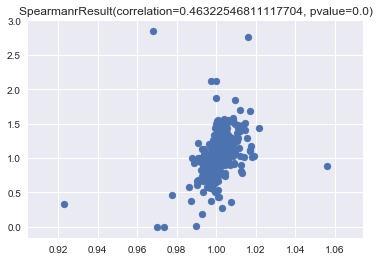

TRECDataset-HUM tfchi2


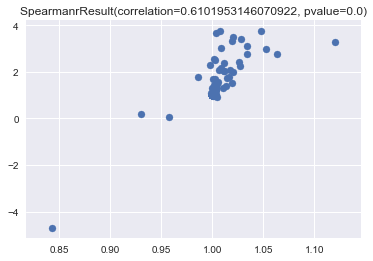

TRECDataset-HUM tfig


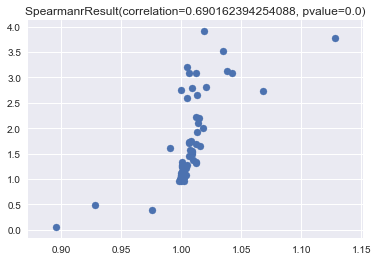

TRECDataset-HUM tfgr


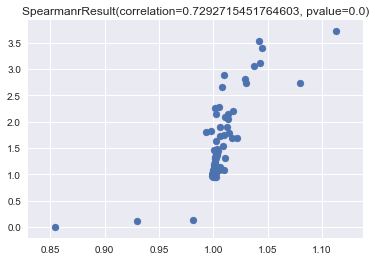

TRECDataset-HUM tfor


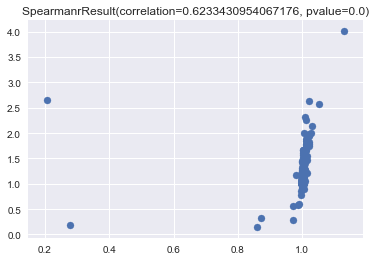

TRECDataset-HUM tfrf


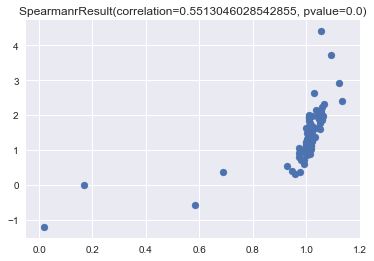

TRECDataset-LOC None


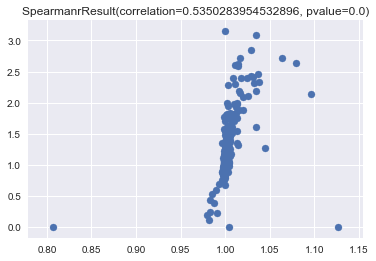

TRECDataset-LOC tfidf


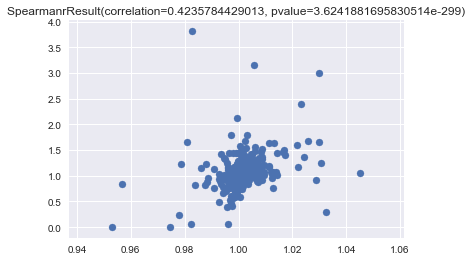

TRECDataset-LOC tfchi2


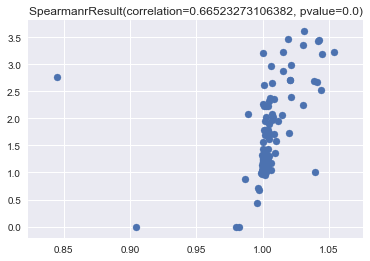

TRECDataset-LOC tfig


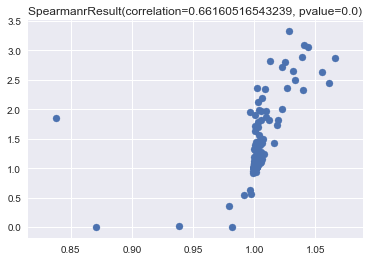

TRECDataset-LOC tfgr


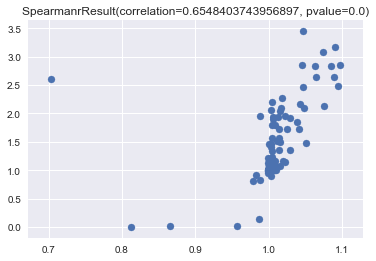

TRECDataset-LOC tfor


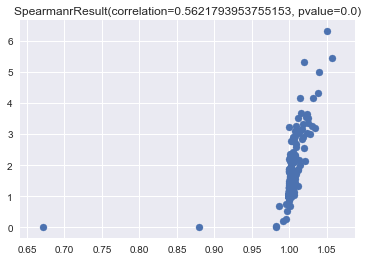

TRECDataset-LOC tfrf


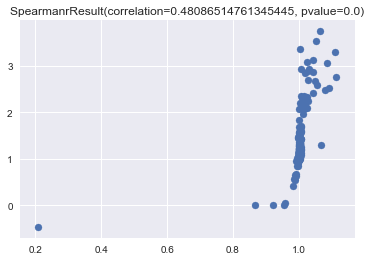

TRECDataset-NUM None


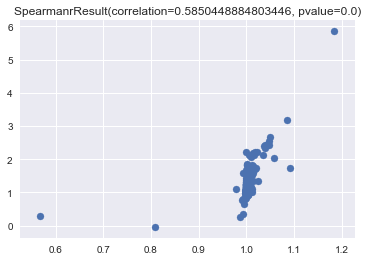

TRECDataset-NUM tfidf


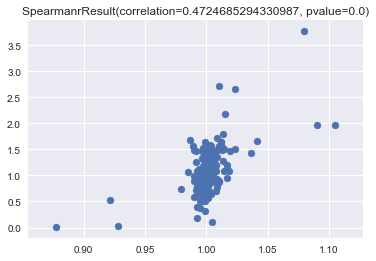

TRECDataset-NUM tfchi2


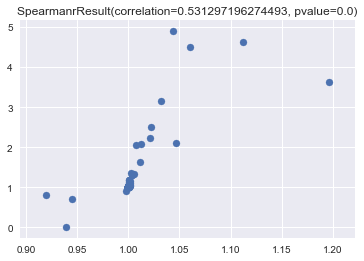

TRECDataset-NUM tfig


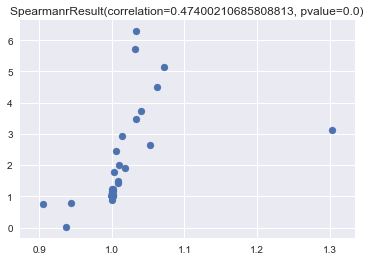

TRECDataset-NUM tfgr


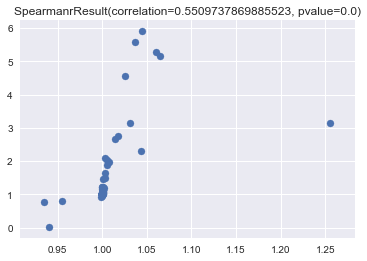

TRECDataset-NUM tfor


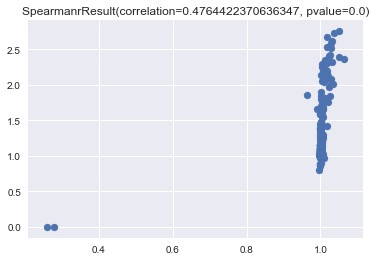

TRECDataset-NUM tfrf


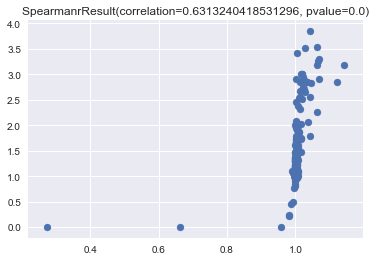

In [23]:
for dat in utils.NOTREC + utils.TREC:
    for scheme in elsa.ELSA.SCHEMES:
        print(dat, scheme)
        correlate(dumps[dat][('batch',scheme,0.001,0)]['w'], dumps[dat][('batch',scheme,0.1,0)]['w'])
        plt.show()
        

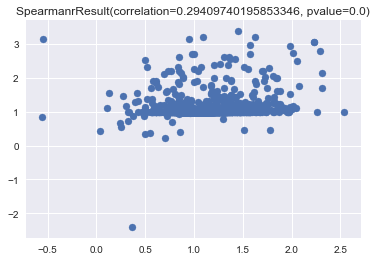

In [24]:
correlate(dumps['SUBJDataset'][('batch','None',0.1,0)]['w'], dumps['SUBJDataset'][('batch','tfchi2',0.1,0)]['w'])

In [25]:
dumps.keys()

dict_keys(['TRECDataset-NUM', 'TRECDataset-DESC', 'TRECDataset-HUM', 'MPQADataset', 'MRDataset', 'CRDataset', 'TRECDataset-ENTY', 'TRECDataset-LOC', 'SUBJDataset', 'TRECDataset-ABBR'])

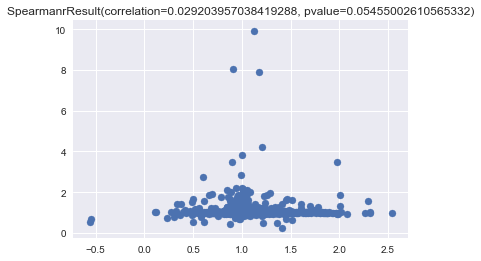

In [26]:
correlate(dumps['SUBJDataset'][('batch','None',0.1,0)]['w'], dumps['TRECDataset-DESC'][('batch','None',0.1,0)]['w'])

In [27]:
tex = anal_w(dumps['SUBJDataset'][('batch','None',0.1,0)]['w'])
pyperclip.copy(tex)
print(tex)


\begin{table}[h]
    \centering
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
       words &  $w'$ \\
\midrule
    directed &  2.54 \\
 interesting &  2.32 \\
          if &  2.31 \\
           i &  2.29 \\
     looking &  2.26 \\
           [ &  2.23 \\
           ] &  2.23 \\
       money &  2.08 \\
       drama &  2.06 \\
      scenes &  2.04 \\
\bottomrule
\end{tabular}

      \subcaption{Words with heighest $w'$}
    \end{minipage}
    \begin{minipage}{.4\linewidth}
      \centering
        \begin{tabular}{lr}
\toprule
 words &  $w'$ \\
\midrule
   all &  0.32 \\
    on &  0.31 \\
   but &  0.27 \\
    's &  0.26 \\
   the &  0.24 \\
 years &  0.12 \\
     \& &  0.11 \\
     ) &  0.03 \\
    it & -0.55 \\
     , & -0.56 \\
\bottomrule
\end{tabular}

      \subcaption{Words with lowest $w'$}
    \end{minipage} 
    \caption{}
    \label{}
\end{table}



In [ ]:
anal_w(dumps['CRDataset'][('batch','None',0.1,0)]['w'])

In [34]:
epochs = defaultdict(dict)

for dataset in utils.TREC+ utils.NOTREC:
    for scheme in elsa.ELSA.SCHEMES:
        pom = len(dumps[dataset][('batch',scheme,0.1,0)]['train'])
        epochs[dataset][scheme] = pom

In [36]:
pd.DataFrame(epochs).describe()

,CRDataset,MPQADataset,MRDataset,SUBJDataset,TRECDataset-ABBR,TRECDataset-DESC,TRECDataset-ENTY,TRECDataset-HUM,TRECDataset-LOC,TRECDataset-NUM
count,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000
mean,42.714286,83.142857,43.000000,48.142857,32.0,54.000000,50.000000,34.714286,42.142857,38.571429
std,23.641167,92.486807,11.224972,23.060996,0.0,16.532796,9.831921,3.817254,13.692195,7.299706
min,32.000000,32.000000,32.000000,32.000000,32.0,33.000000,33.000000,32.000000,32.000000,32.000000
25%,32.000000,35.500000,34.000000,32.500000,32.0,41.500000,46.000000,32.500000,32.000000,32.500000
50%,32.000000,45.000000,39.000000,42.000000,32.0,52.000000,49.000000,34.000000,32.000000,35.000000
75%,37.500000,72.500000,51.000000,50.500000,32.0,68.000000,56.500000,34.500000,50.500000,44.000000
max,96.000000,289.000000,60.000000,97.000000,32.0,74.000000,63.000000,43.000000,66.000000,50.000000


In [37]:
pd.DataFrame(epochs).T.describe()

,None,tfchi2,tfgr,tfidf,tfig,tfor,tfrf
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,44.80000,41.500000,41.400000,40.400000,71.900000,41.800000,46.100000
std,14.51283,12.851718,10.986861,13.065646,78.711075,15.654605,20.872363
min,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
25%,32.25000,32.250000,32.500000,32.000000,33.500000,32.000000,32.000000
50%,45.00000,36.500000,37.000000,32.500000,45.000000,32.500000,37.000000
75%,49.00000,45.750000,48.000000,47.750000,58.000000,44.250000,52.250000
max,79.00000,73.000000,63.000000,66.000000,289.000000,74.000000,97.000000
